In [90]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import numpy as np
import math
import os
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d  

import plotly.graph_objects as go
import plotly.io as pio
pio.renderers.default = 'iframe' # or 'colab' or 'iframe' or 'iframe_connected' or 'sphinx_gallery'
from math import log2, radians, cos, sqrt

pd.options.display.max_rows = 4000

from matplotlib.colors import ListedColormap


In [91]:
taem_phase_color_map_val = [0, 1, 2, 3]
taem_phase_color_map = ListedColormap(['red', 'blue', 'green', 'orange'])

In [92]:
data_taem = pd.read_csv('taem_dump.csv')

data_taem['time'] = data_taem['dtg'].cumsum()


data_taem.head()

data_taem.dtypes

,dtg,h,hdot,x,y,surfv,surfv_h,xdot,ydot,psd,...,xhac,xmep,ysgn,ysturn,xcir,ycir,yhac,rcir,Unnamed: 81,time
0,0.20,145359.821020,-366.854099,66338.661190,678534.092709,5257.624558,5244.810203,-32.185605,-5244.711446,-90.351607,...,-31992.869664,-18476.220501,-1,1,-98331.530855,-692534.092709,-14000,699480.206671,NaN,0.20
1,0.20,145286.257525,-368.795735,66316.790472,677492.781857,5255.976394,5243.021797,-32.260137,-5242.922548,-90.352541,...,-31992.869664,-18476.220501,-1,1,-98309.660136,-691492.781857,-14000,698446.173042,NaN,0.40
2,0.22,145204.890351,-370.900064,66292.752129,676347.746843,5254.128165,5241.020504,-32.332859,-5240.920769,-90.353471,...,-31992.869664,-18476.220501,-1,1,-98285.621793,-690347.746843,-14000,697309.167459,NaN,0.62
3,0.22,145123.064618,-372.975606,66268.735133,675203.148625,5252.244450,5238.984726,-32.406987,-5238.884495,-90.354419,...,-31992.869664,-18476.220501,-1,1,-98261.604797,-689203.148625,-14000,696172.624463,NaN,0.84
4,0.20,145048.282069,-374.833964,66246.919979,674162.987799,5250.526830,5237.130081,-32.424167,-5237.029708,-90.354732,...,-31992.869664,-18476.220501,-1,1,-98239.789643,-688162.987799,-14000,695139.808992,NaN,1.04


dtg            float64
h              float64
hdot           float64
x              float64
y              float64
surfv          float64
surfv_h        float64
xdot           float64
ydot           float64
psd            float64
mach           float64
qbar           float64
cosphi         float64
costh          float64
weight         float64
gamma          float64
ovhd              bool
rwid            object
cubic_c3       float64
cubic_c4       float64
pbhc           float64
pbrc           float64
delrng           int64
dnzc             int64
dnzcl          float64
dnzll          float64
dnzul          float64
dpsac          float64
drpred         float64
dsbc_at        float64
dsbi             int64
eas_cmd        float64
emep           float64
eow            float64
en             float64
emax           float64
emin           float64
es             float64
hderr          float64
herror         float64
hdref          float64
href           float64
iel              int64
igi        

Text(0.5, 0, 'Range')

Text(0, 0.5, 'EOW')

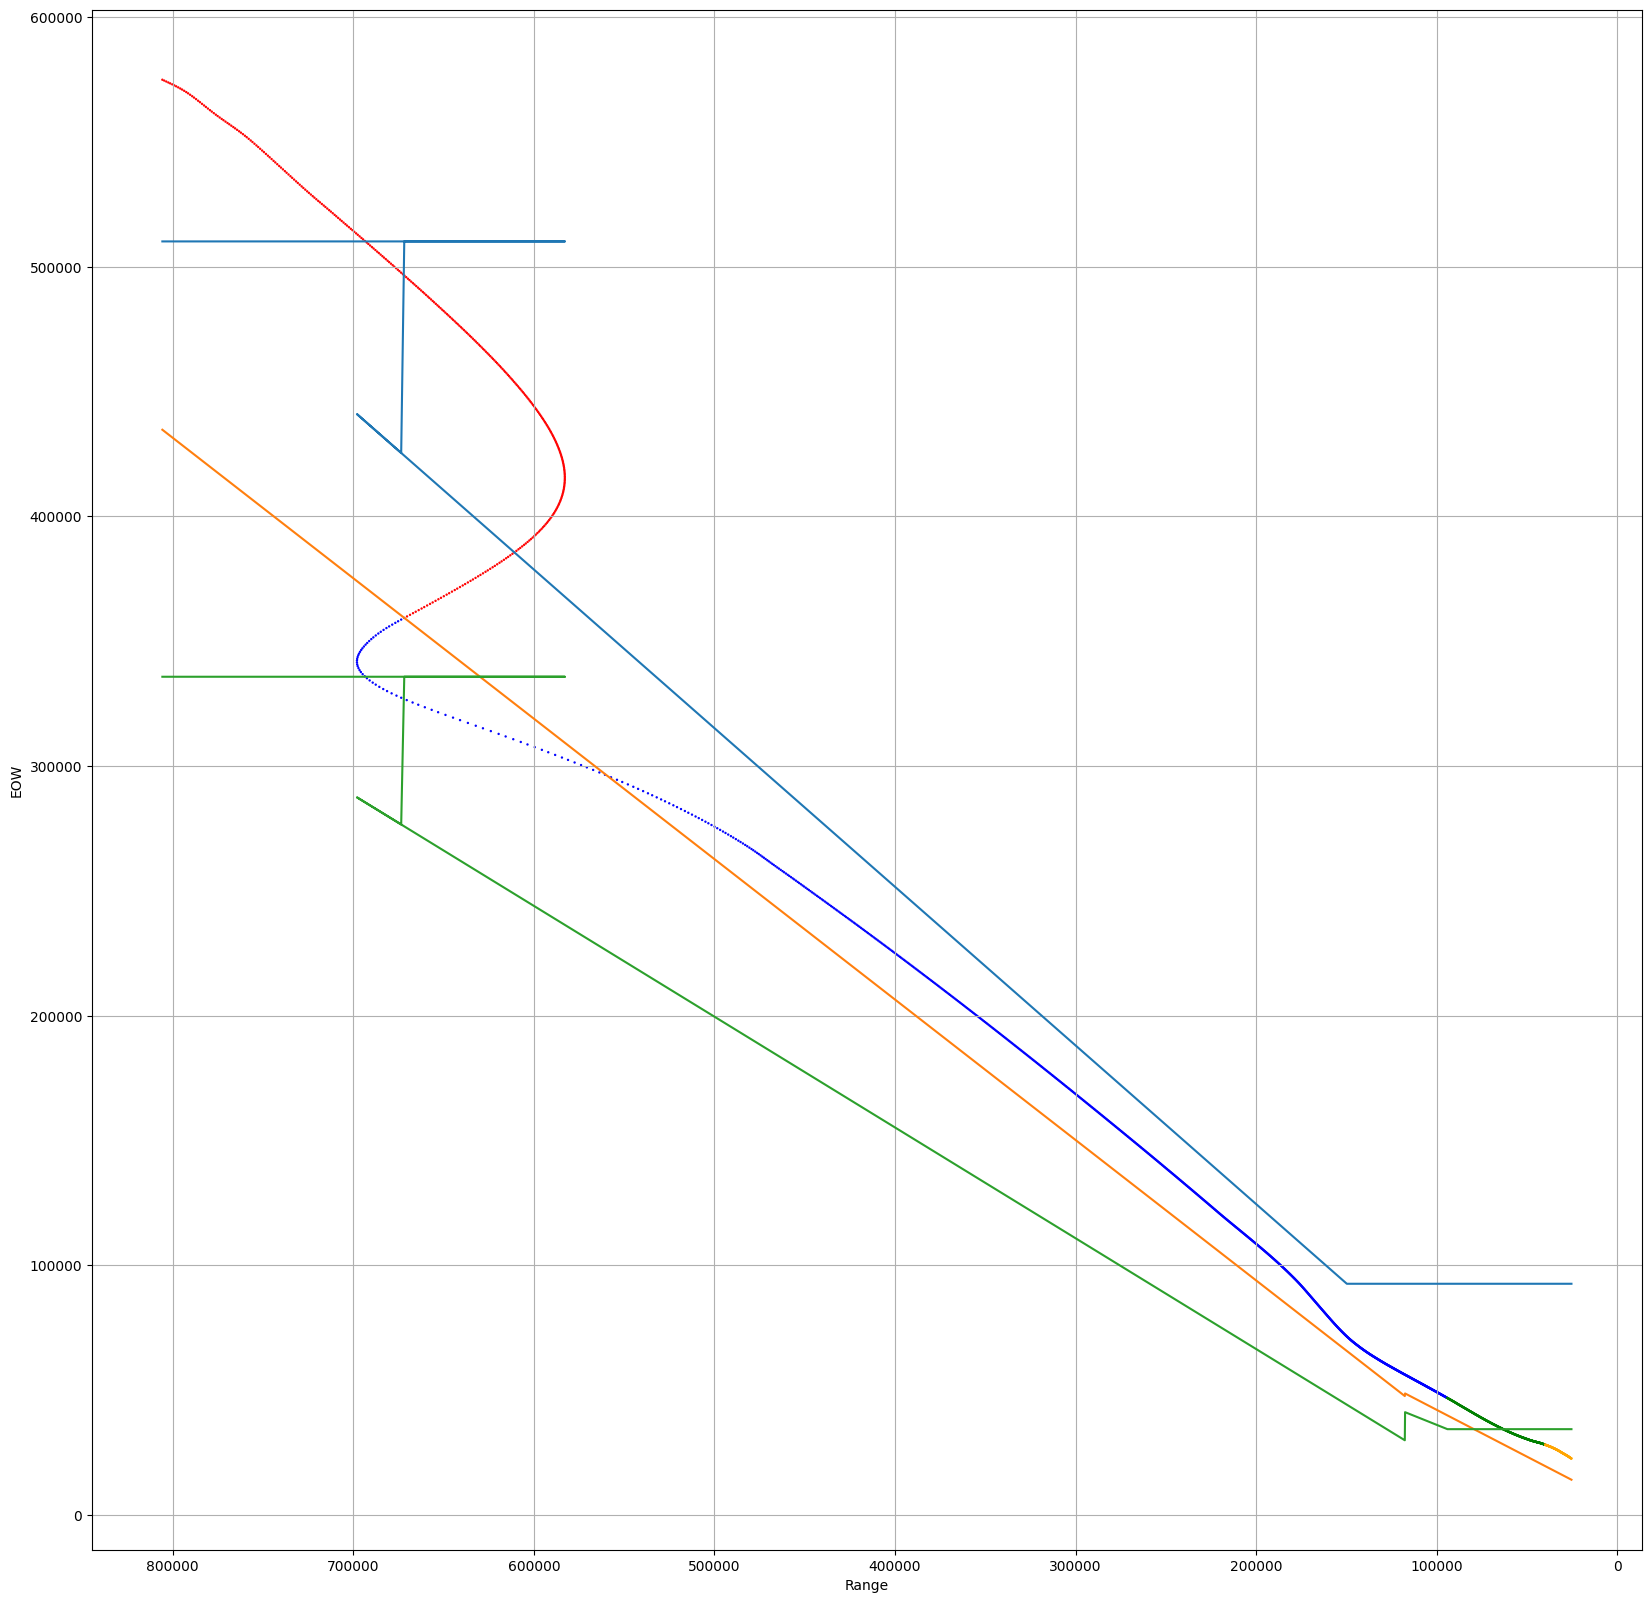

In [93]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20, 20))
    
plt_ = ax
plt_.scatter(data_taem['rpred'], data_taem['eow'], s=0.5, c=data_taem['iphase'], cmap=taem_phase_color_map, vmin=0, vmax=3)
plt_.plot(data_taem['rpred'], data_taem['es'])
plt_.plot(data_taem['rpred'], data_taem['en'])
plt_.plot(data_taem['rpred'], data_taem['emep'])


plt_.set_xlabel('Range')
plt_.set_ylabel('EOW')
plt_.grid()

plt_.invert_xaxis()

Text(0.5, 0, 'Range')

Text(0, 0.5, 'EOW')

(0.0, 150000.0)

(0.0, 100000.0)

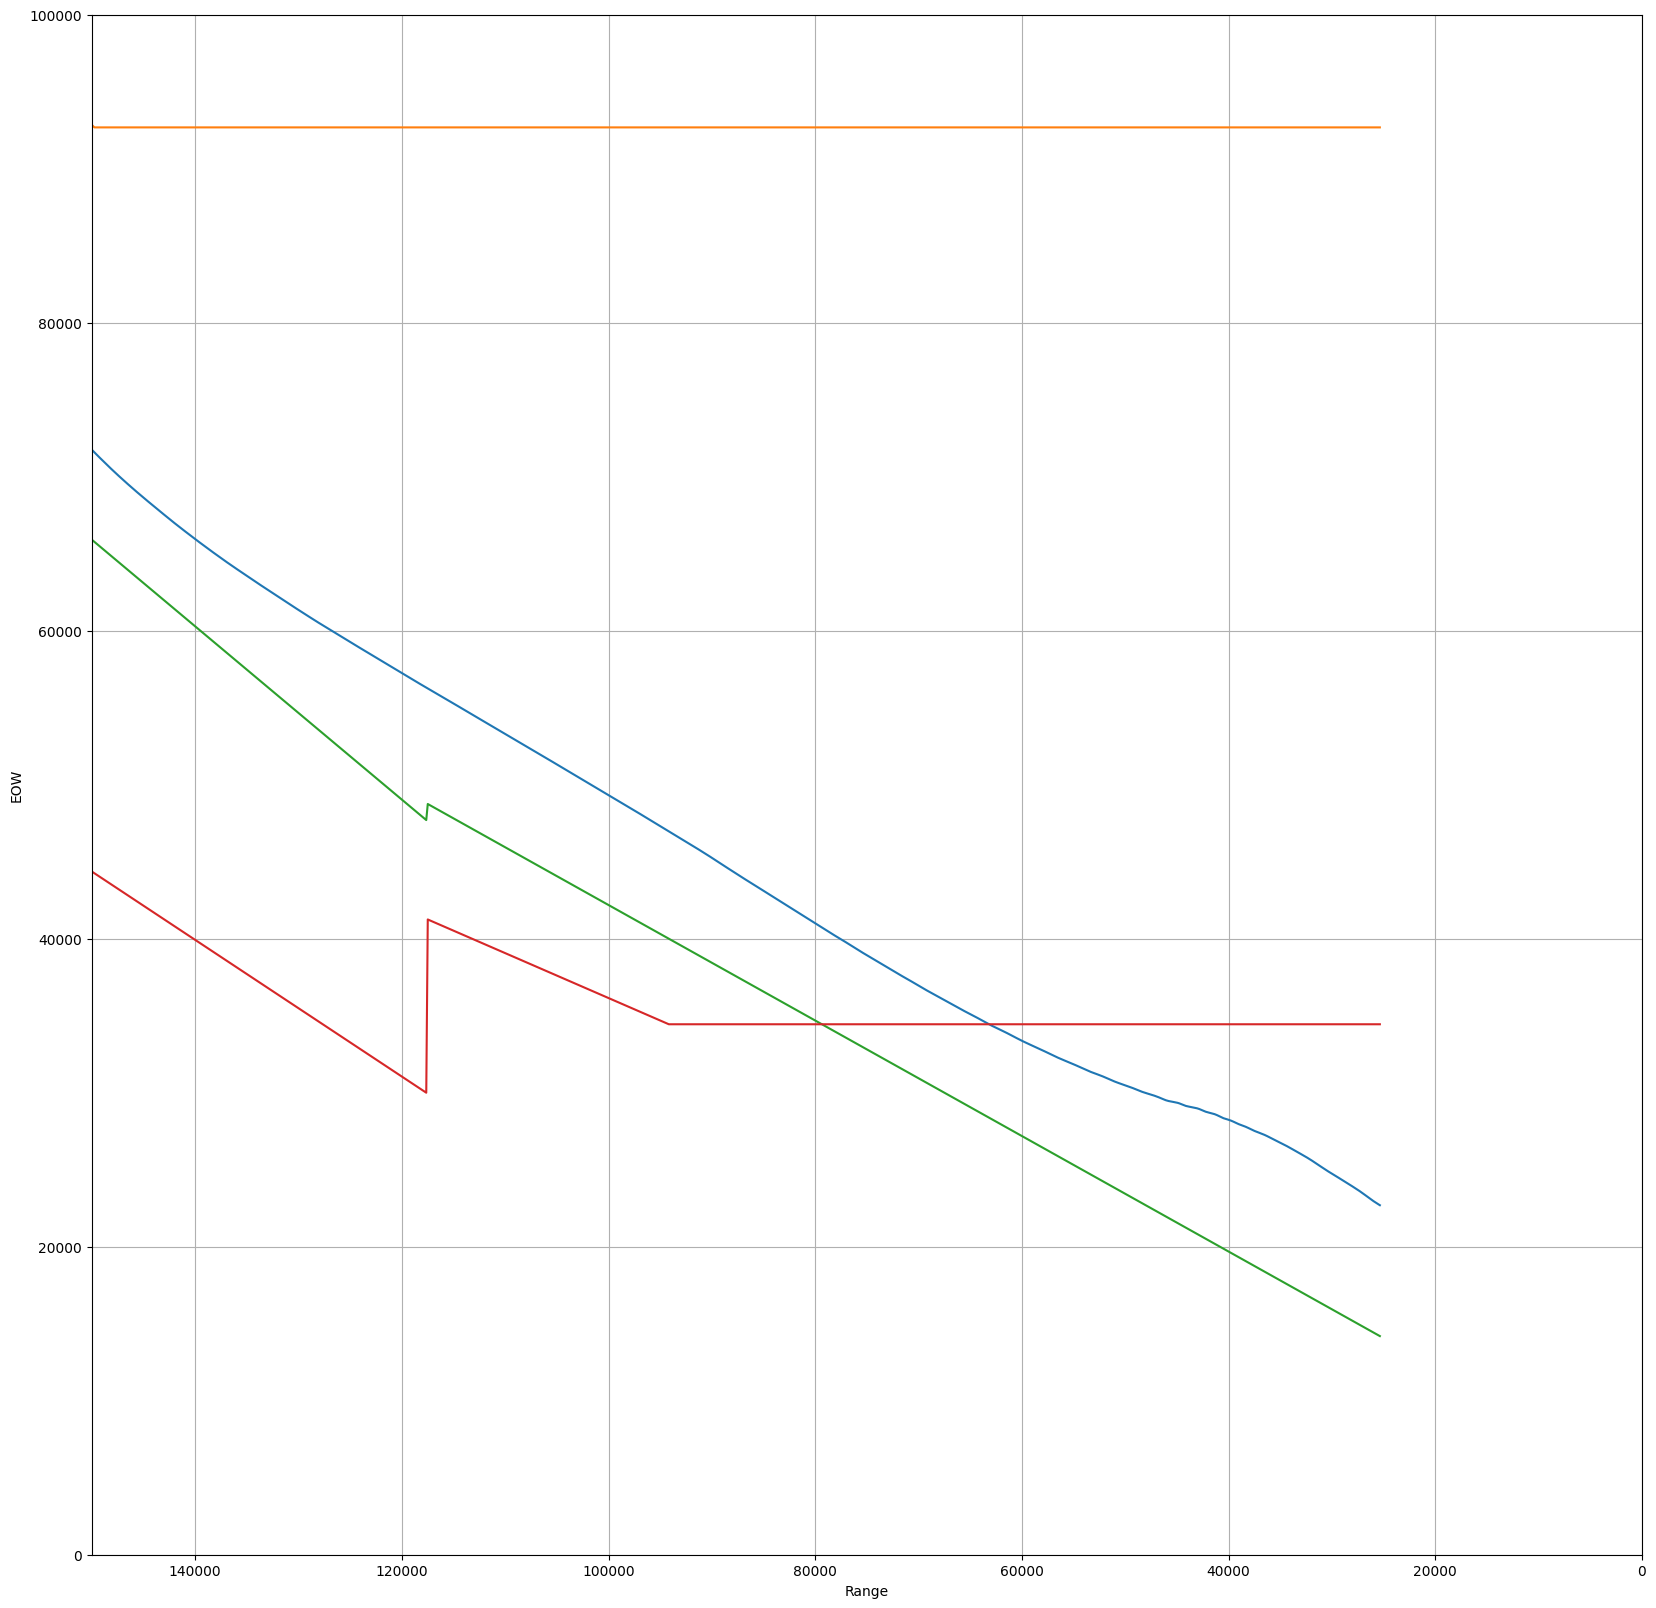

In [94]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20, 20))
    
plt_ = ax
plt_.plot(data_taem['rpred'], data_taem['eow'])
plt_.plot(data_taem['rpred'], data_taem['es'])
plt_.plot(data_taem['rpred'], data_taem['en'])
plt_.plot(data_taem['rpred'], data_taem['emep'])


plt_.set_xlabel('Range')
plt_.set_ylabel('EOW')
plt_.grid()

plt_.set_xlim([0, 150000])
plt_.set_ylim([0, 100000])

plt_.invert_xaxis()

Text(0.5, 0, 'time')

Text(0, 0.5, 'rpred')

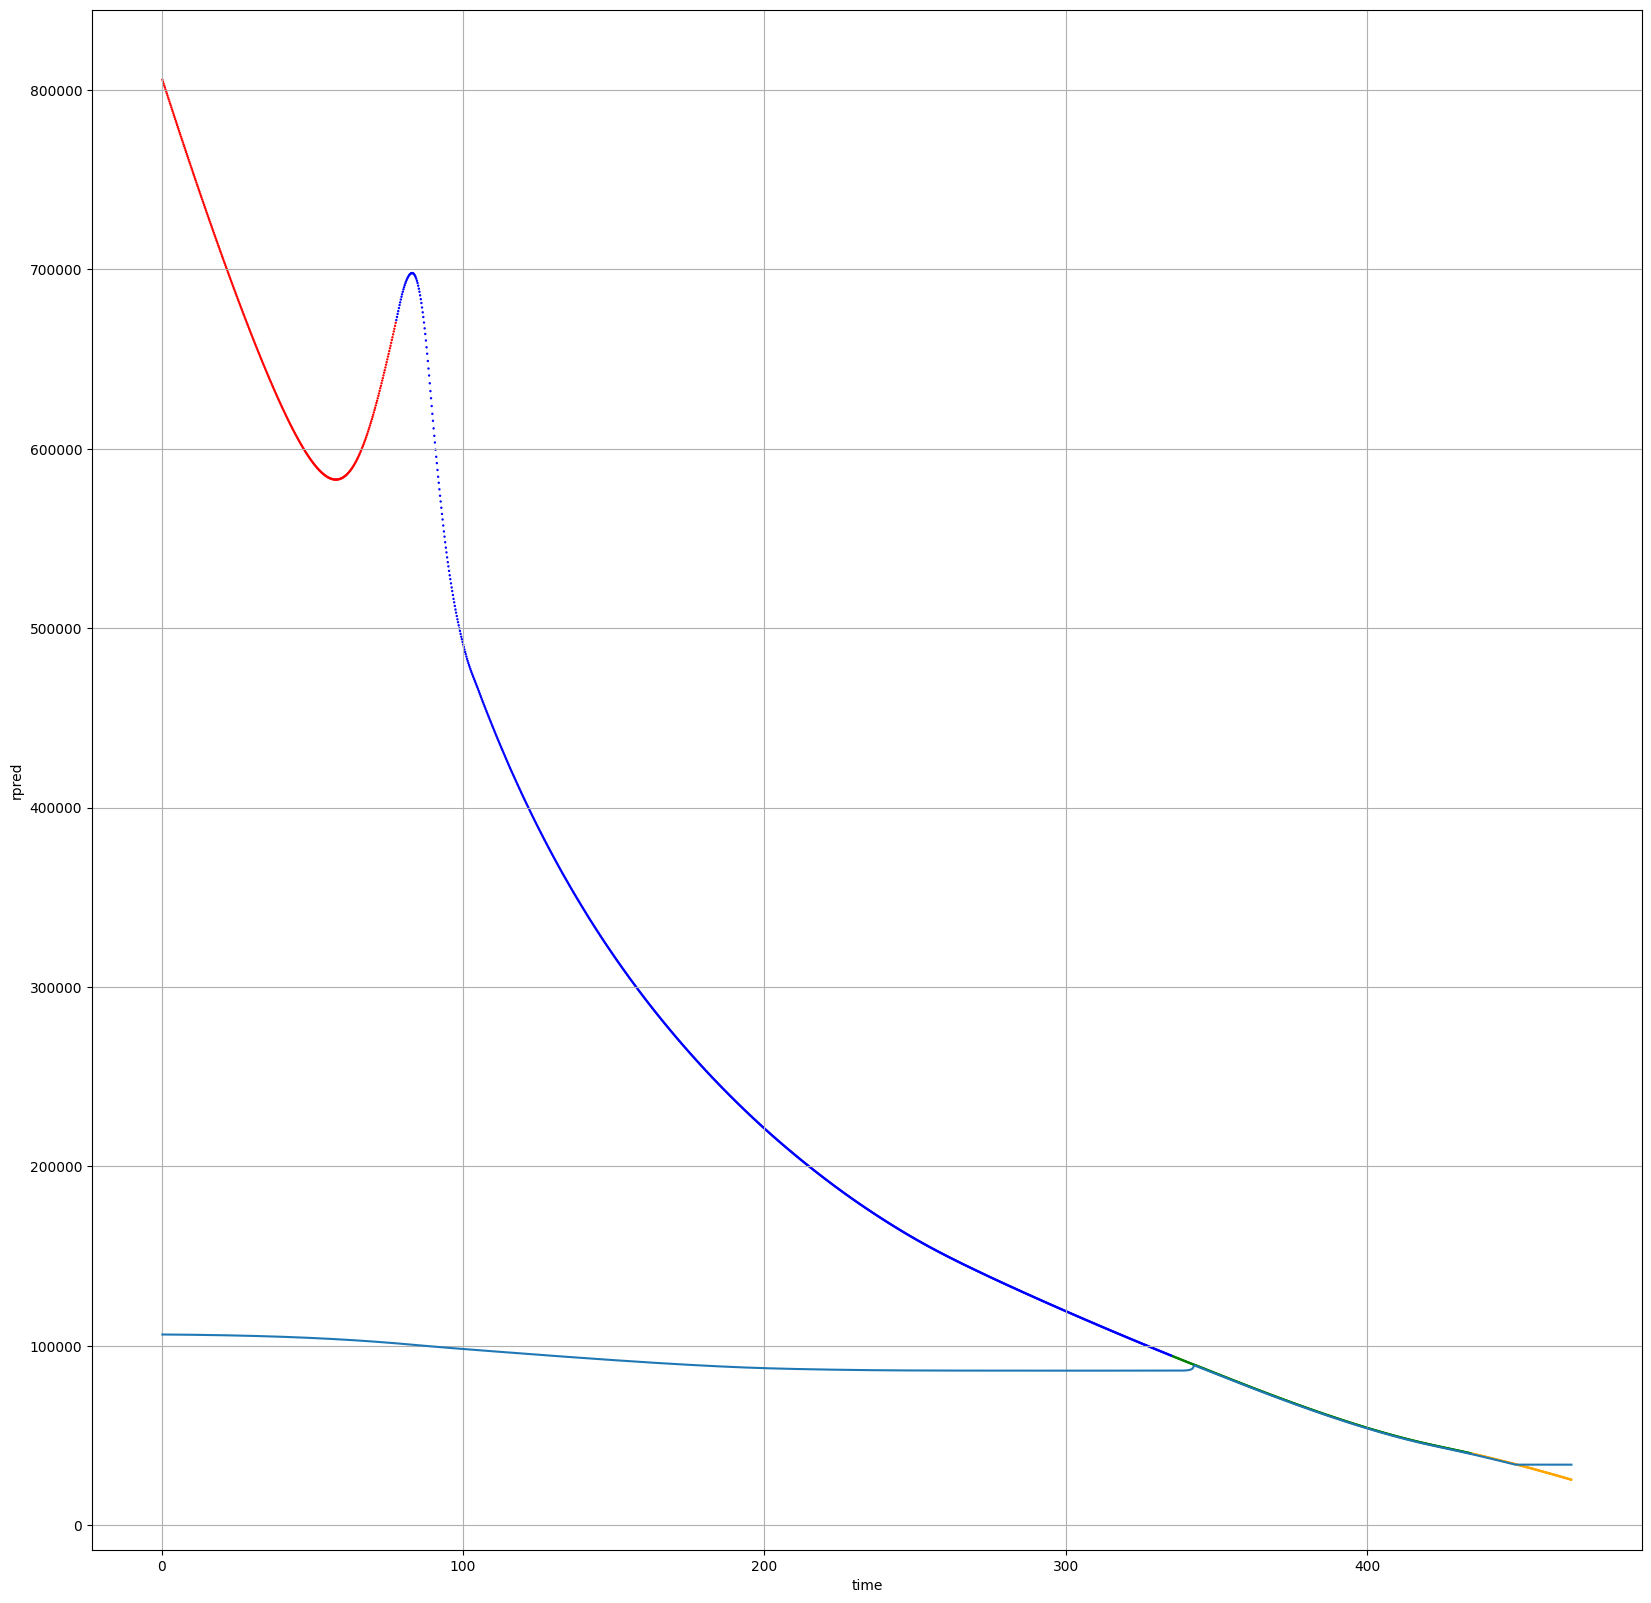

In [95]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20, 20))
    
plt_ = ax
plt_.scatter(data_taem['time'], data_taem['rpred'], s=0.5, c=data_taem['iphase'], cmap=taem_phase_color_map, vmin=0, vmax=3)
plt_.plot(data_taem['time'], data_taem['rpred2'])


plt_.set_xlabel('time')
plt_.set_ylabel('rpred')
plt_.grid()




Text(0.5, 0, 'time')

Text(0, 0.5, 'rpred')

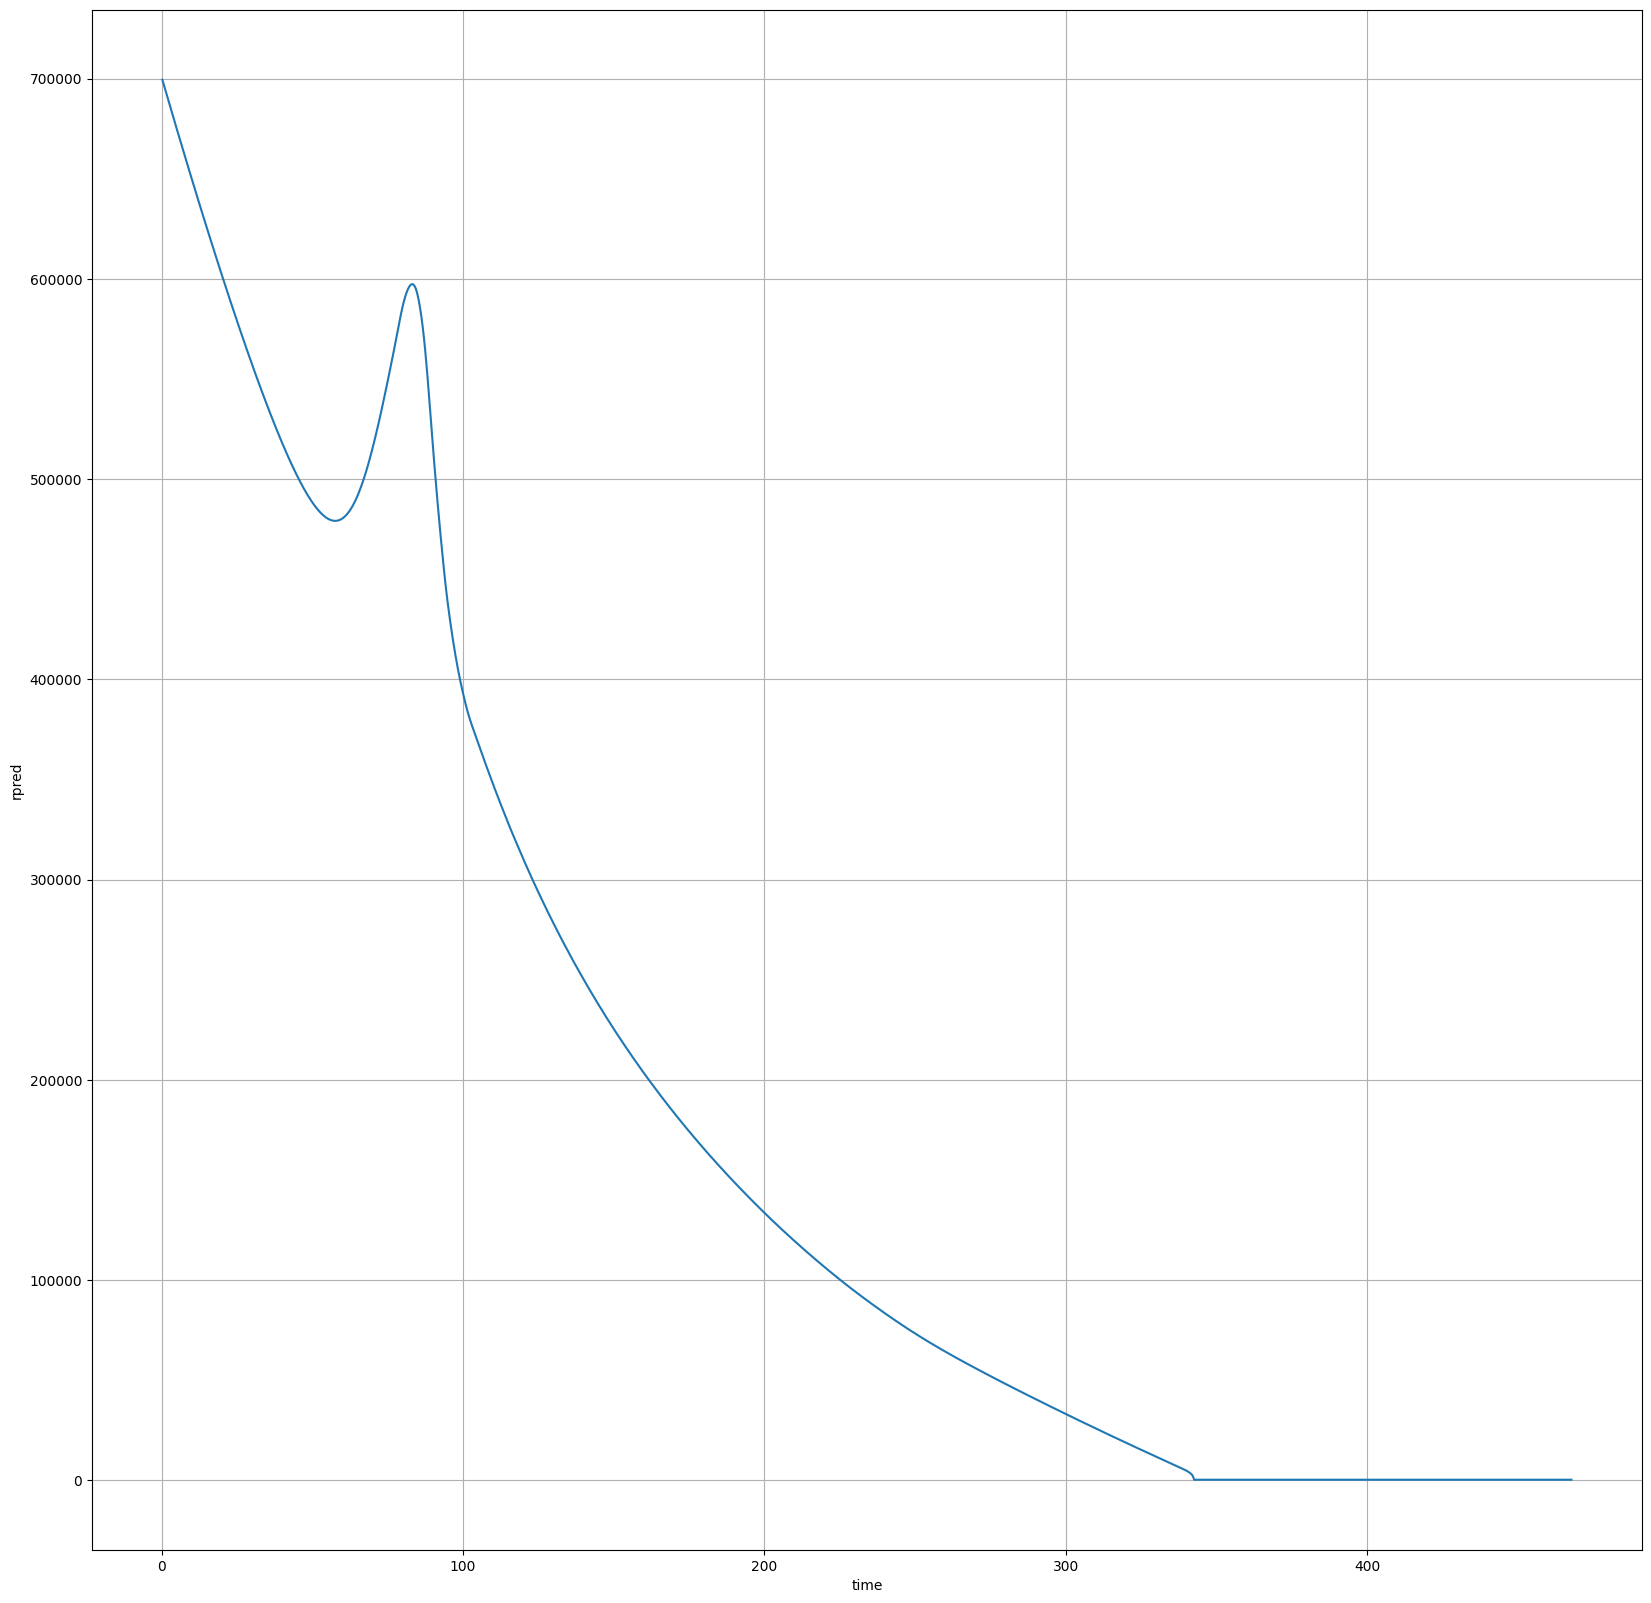

In [96]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20, 20))
    
plt_ = ax
plt_.plot(data_taem['time'], data_taem['rtan'])


plt_.set_xlabel('time')
plt_.set_ylabel('rpred')
plt_.grid()




Text(0.5, 0, 'time')

Text(0, 0.5, 'psc')

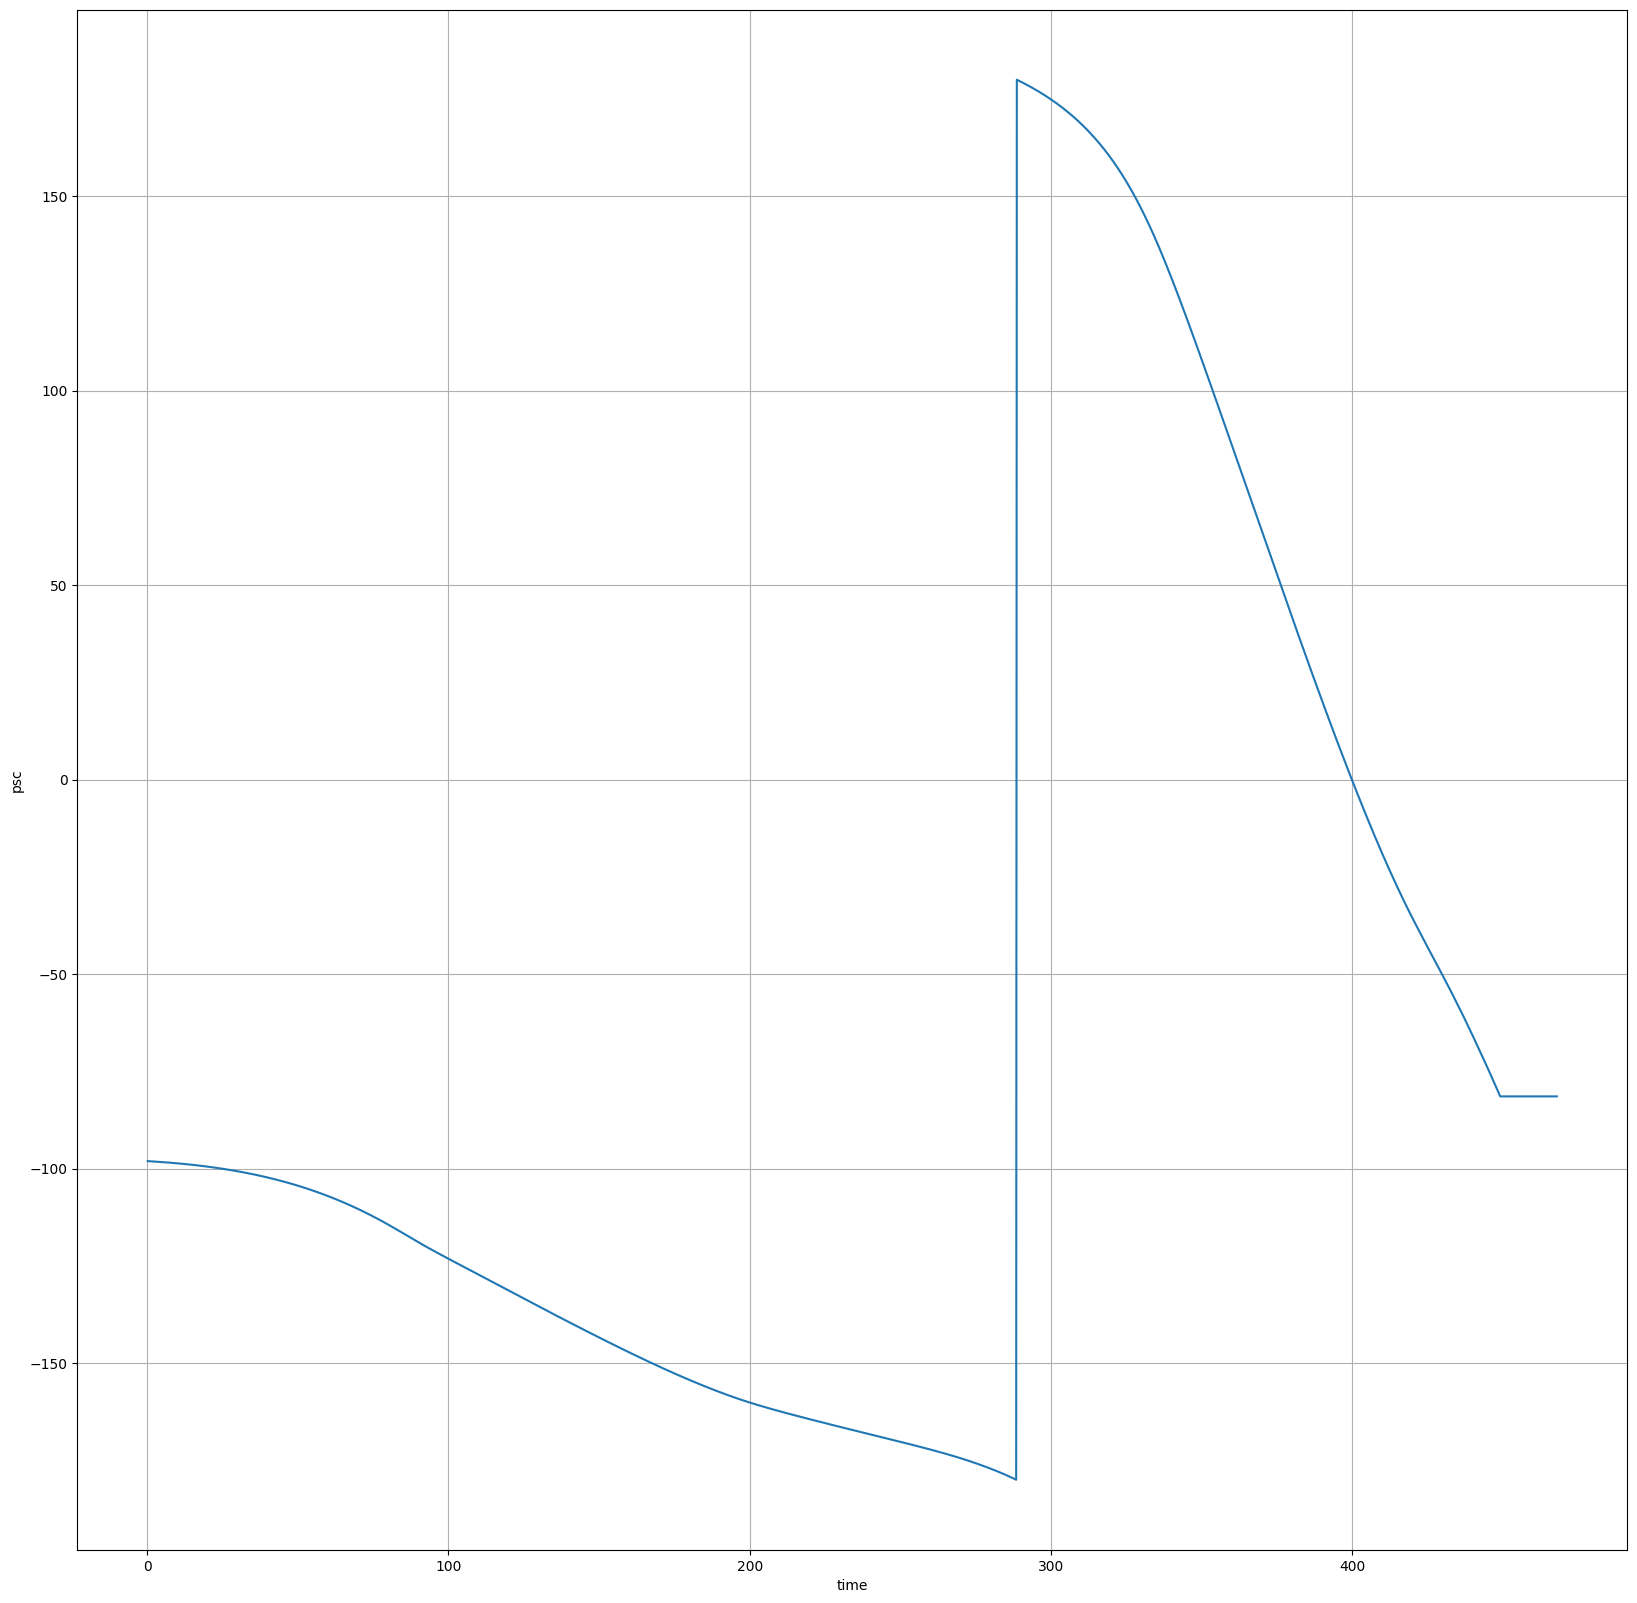

In [97]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20, 20))
    
plt_ = ax
plt_.plot(data_taem['time'], data_taem['psc'])


plt_.set_xlabel('time')
plt_.set_ylabel('psc')
plt_.grid()




Text(0.5, 0, 'time')

Text(0, 0.5, 'pst')

(320.0, 400.0)

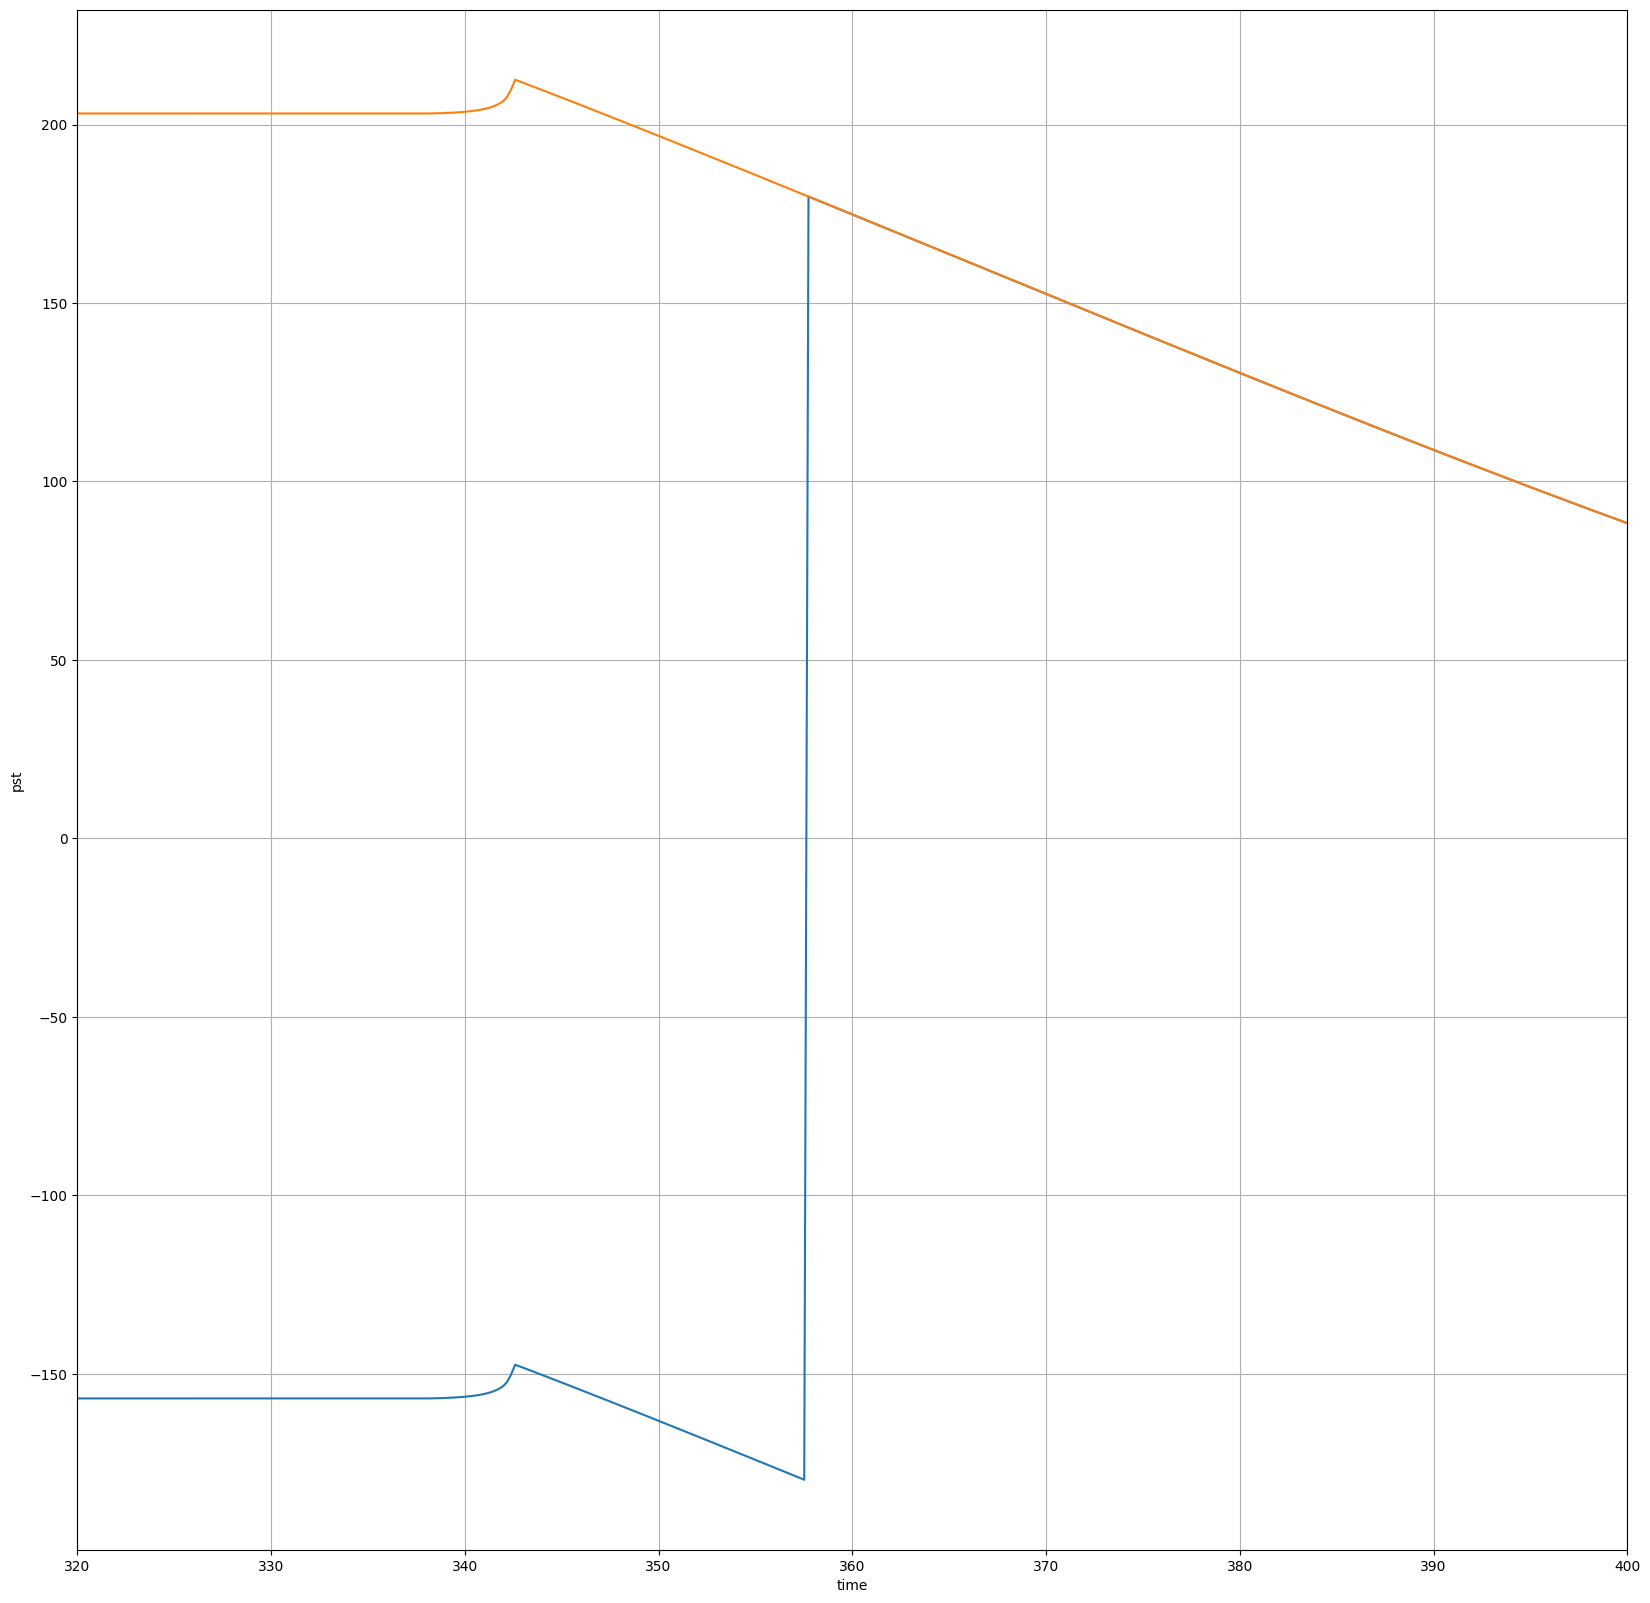

In [98]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20, 20))
    
plt_ = ax
plt_.plot(data_taem['time'], data_taem['pst'])
plt_.plot(data_taem['time'], data_taem['psc'] - data_taem['ysgn'] * np.arctan2(data_taem['rturn'], data_taem['rtan']) * 180 / np.pi)

 


plt_.set_xlabel('time')
plt_.set_ylabel('pst')
plt_.grid()

plt_.set_xlim([320, 400])

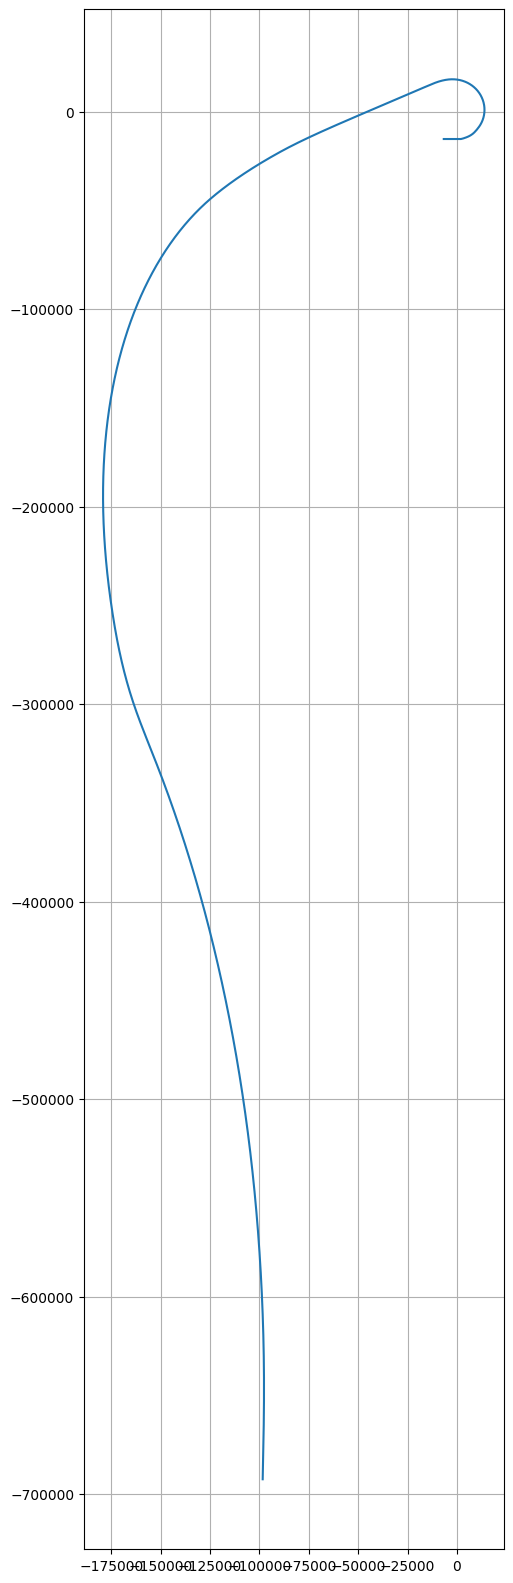

In [99]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20, 20))

plt_ = ax
plt_.plot(data_taem['xcir'], data_taem['ycir'])


plt_.set_aspect('equal')

plt_.grid()